In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
train_df = pd.read_csv('../input/airline-passenger-satisfaction/train.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('../input/airline-passenger-satisfaction/test.csv', index_col='Unnamed: 0')

In [3]:
df = pd.concat([train_df, test_df])

In [4]:
df = df.dropna()

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     12948

In [8]:
df = df.drop('id', axis = 1)

In [9]:
df.groupby('satisfaction').count()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,73225,73225,73225,73225,73225,73225,73225,73225,73225,73225,...,73225,73225,73225,73225,73225,73225,73225,73225,73225,73225
satisfied,56262,56262,56262,56262,56262,56262,56262,56262,56262,56262,...,56262,56262,56262,56262,56262,56262,56262,56262,56262,56262


Overall, dataset contains 73225 negative and 56262 positive predictions.

In [10]:
df.groupby('Class').count()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Class,,,,,,,,,,,,,,,,,,,,,
Business,61990,61990,61990,61990,61990,61990,61990,61990,61990,61990,...,61990,61990,61990,61990,61990,61990,61990,61990,61990,61990
Eco,58117,58117,58117,58117,58117,58117,58117,58117,58117,58117,...,58117,58117,58117,58117,58117,58117,58117,58117,58117,58117
Eco Plus,9380,9380,9380,9380,9380,9380,9380,9380,9380,9380,...,9380,9380,9380,9380,9380,9380,9380,9380,9380,9380


In [11]:
df.groupby('Gender').count()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,,,,,,,,,,,,,,,,,,,,,
Female,65703,65703,65703,65703,65703,65703,65703,65703,65703,65703,...,65703,65703,65703,65703,65703,65703,65703,65703,65703,65703
Male,63784,63784,63784,63784,63784,63784,63784,63784,63784,63784,...,63784,63784,63784,63784,63784,63784,63784,63784,63784,63784


Dataset is balanced in terms of gender

In [12]:
df.groupby('Type of Travel').count()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Type of Travel,,,,,,,,,,,,,,,,,,,,,
Business travel,89445,89445,89445,89445,89445,89445,89445,89445,89445,89445,...,89445,89445,89445,89445,89445,89445,89445,89445,89445,89445
Personal Travel,40042,40042,40042,40042,40042,40042,40042,40042,40042,40042,...,40042,40042,40042,40042,40042,40042,40042,40042,40042,40042


In [13]:
numerics = ['int64', 'float64']
train_con_col = df.select_dtypes(include=numerics).columns
train_cat_col = df.select_dtypes(include="object").columns

for cat in train_cat_col:
    le = LabelEncoder()
    df[cat] = le.fit_transform(df[cat])

<AxesSubplot:>

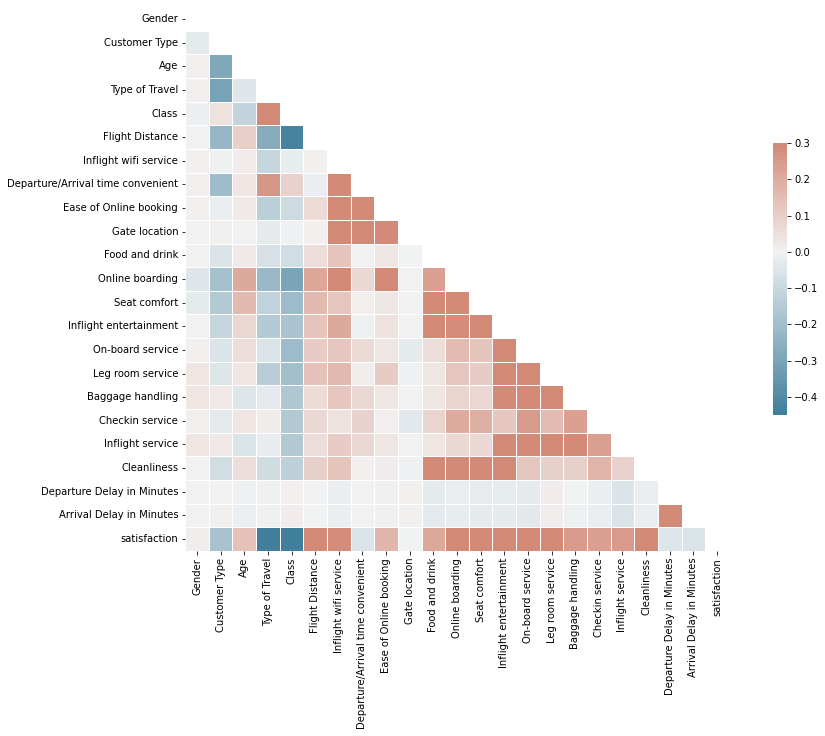

In [14]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Observations from correlation plot
------
Satisfaction is negatively correlated with next variables: *type of travel, Class, Customer type*

Satisfaction is positively correlated with next variables: *Flight distance, Inflight wifi service, Online boarding :: Cleanliness*

In [15]:
features = df.columns
features

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [16]:
df = df.reset_index()

In [17]:
def plot_hist(var):
    sns.displot(data=df, x=var, col="satisfaction")

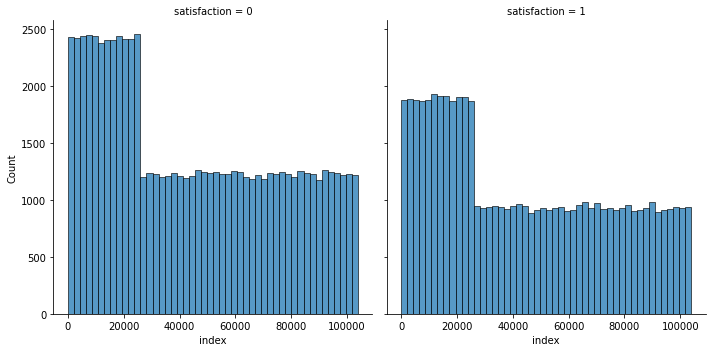

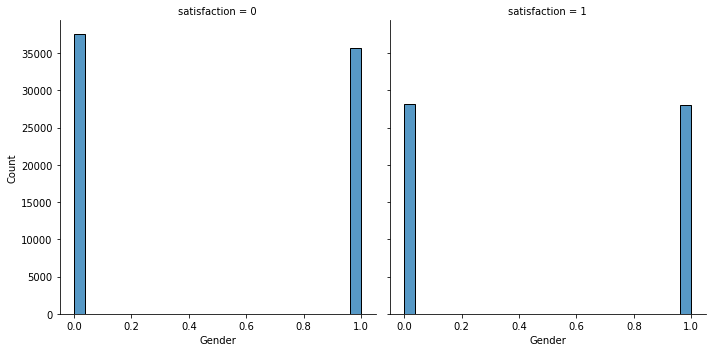

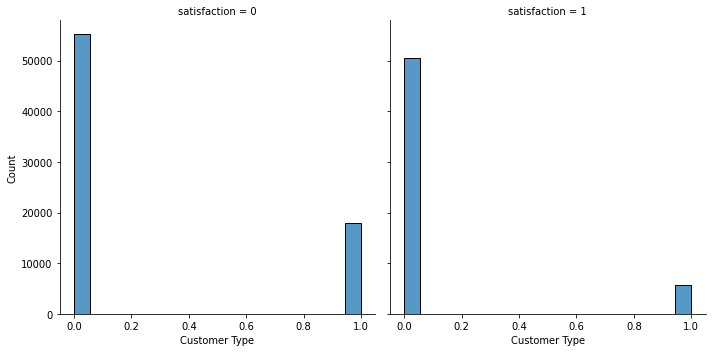

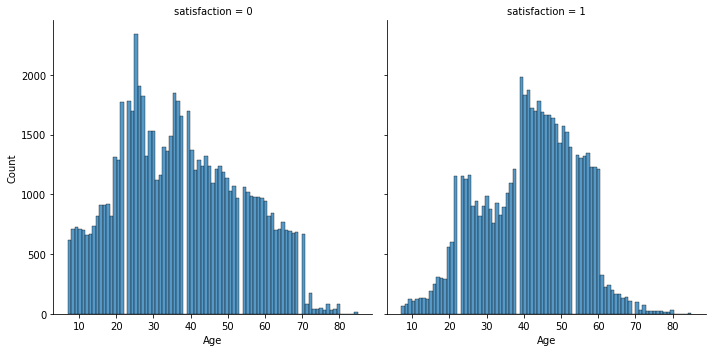

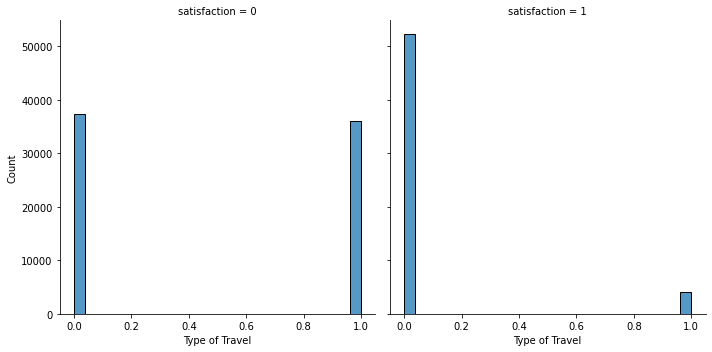

In [18]:
for i in range(5):
    plot_hist(df.columns[i])

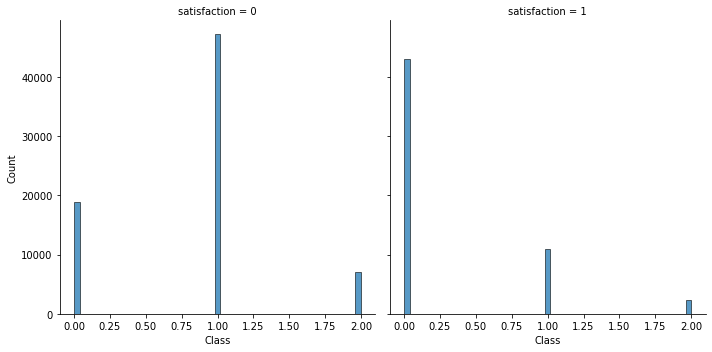

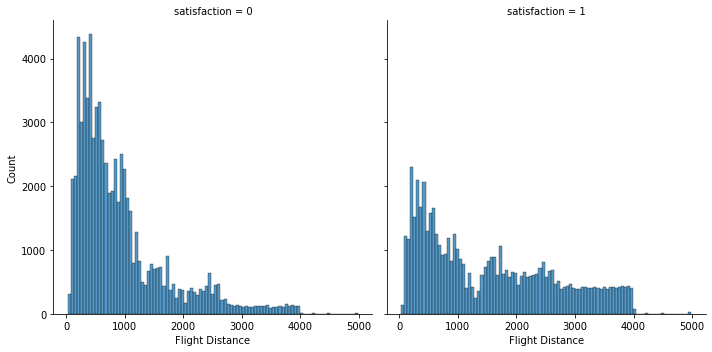

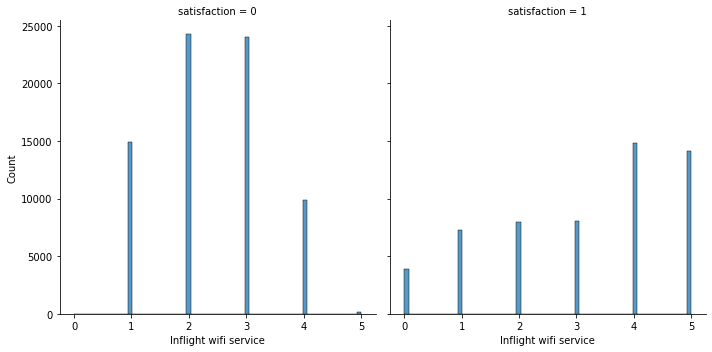

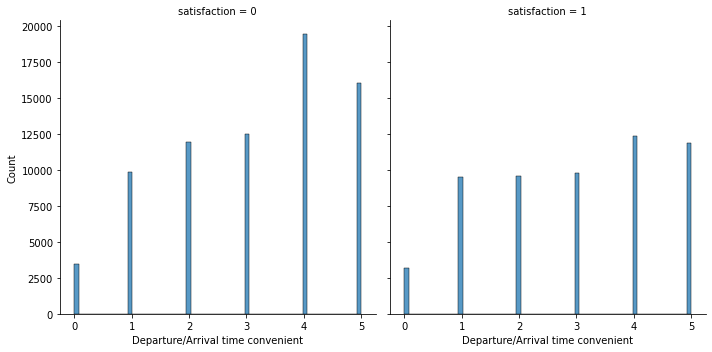

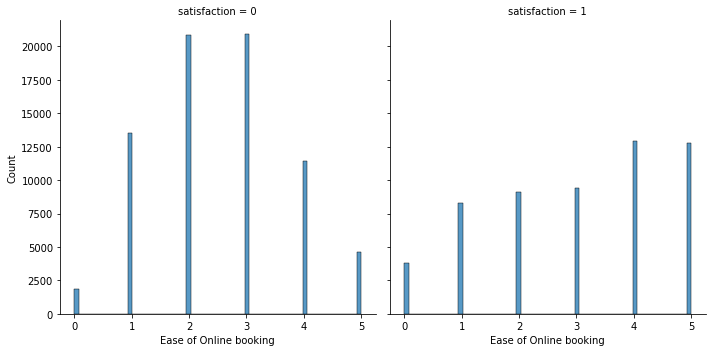

In [19]:
for i in range(5, 10):
    plot_hist(df.columns[i])

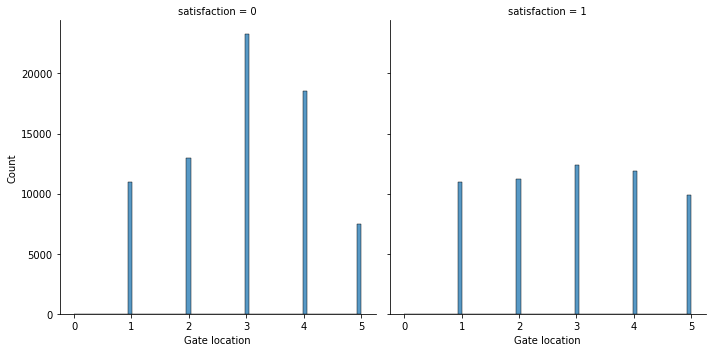

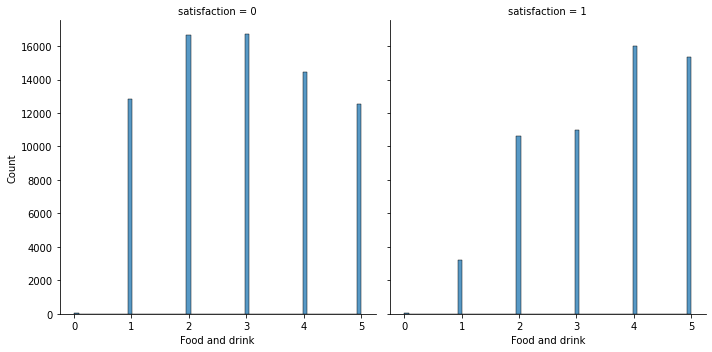

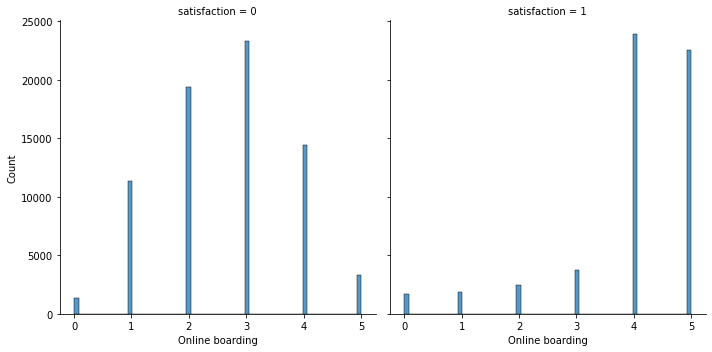

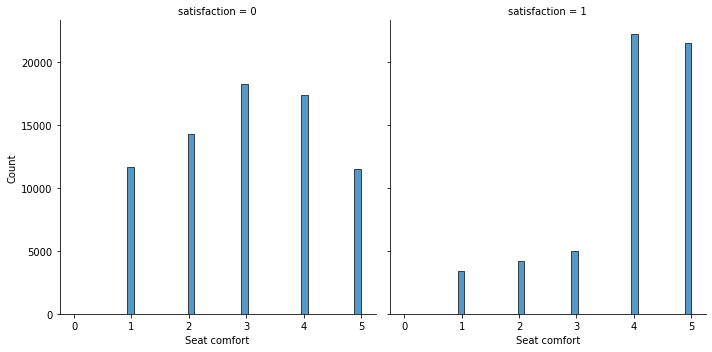

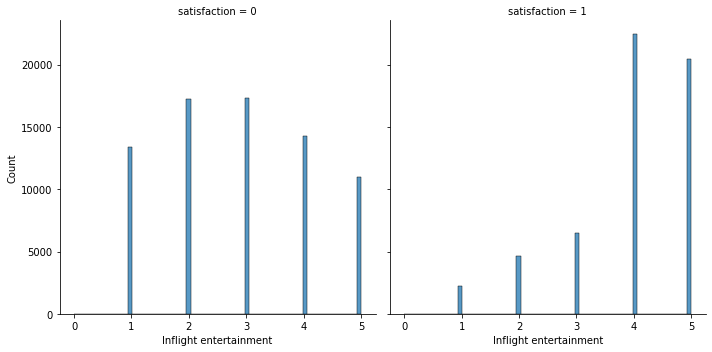

In [20]:
for i in range(10, 15):
    plot_hist(df.columns[i])

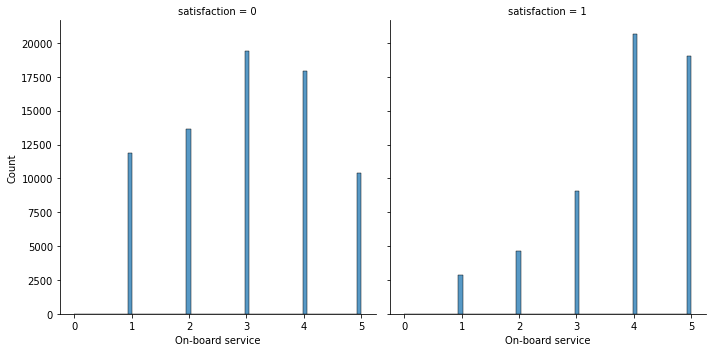

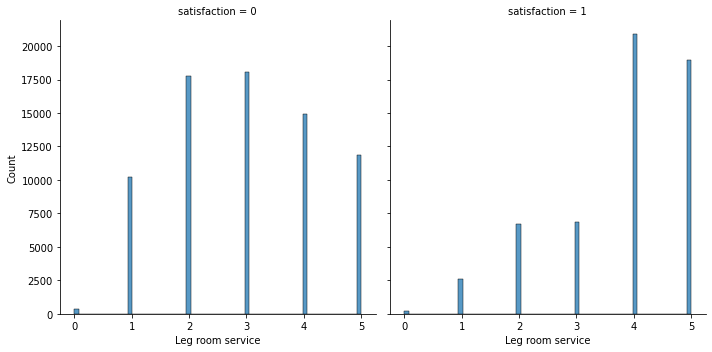

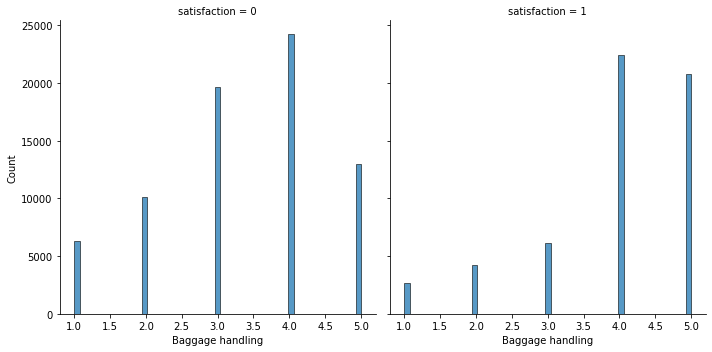

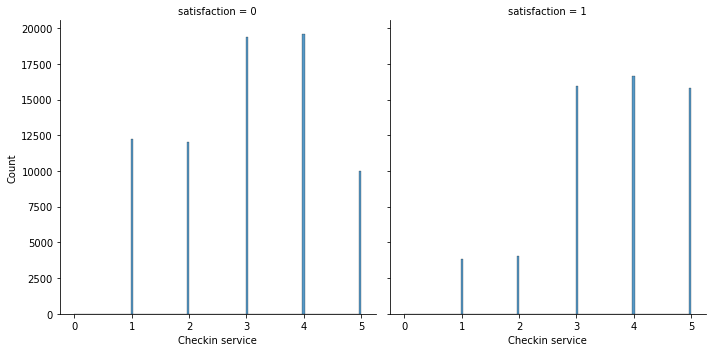

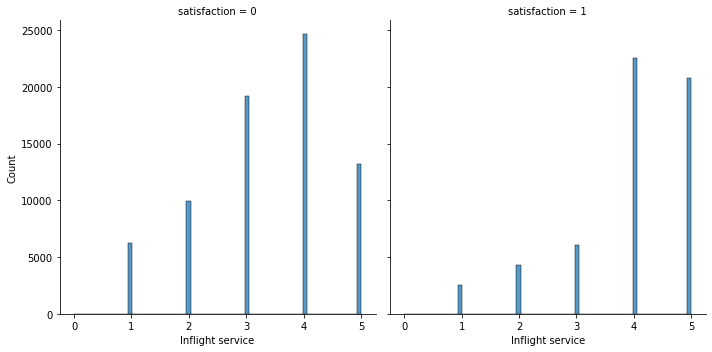

In [21]:
for i in range(15, 20):
    plot_hist(df.columns[i])

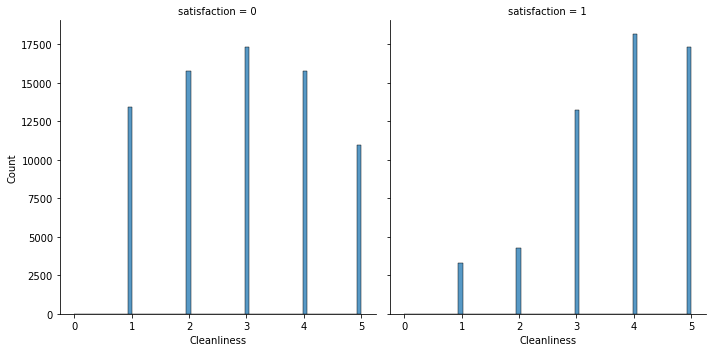

In [22]:
plot_hist('Cleanliness')

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Count'>

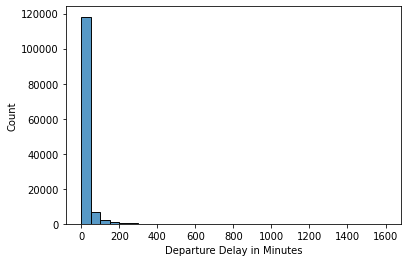

In [23]:
sns.histplot(data = df, x = features[-3], binwidth=50)

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Count'>

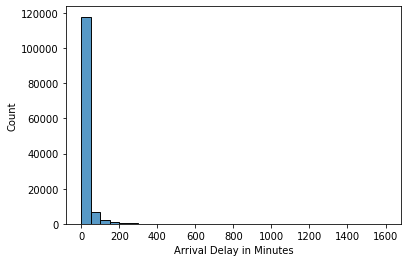

In [24]:
sns.histplot(data = df, x = features[-2], binwidth=50)

### Observations
--------

1. Different distributions are seen in variables: *Class, Customer Type, Type of travel, Flight distance, Inflight wifi service, Ease of online booking, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Cleanliness*.

2. Many of variables mentioned above are correlated. Probably, variable *Class* has an impact on all others.

In [25]:
features

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [26]:
selected_features = features
selected_features = selected_features.drop(['Gender', 'Age', 'Departure/Arrival time convenient', 'Gate location',
                          'Checkin service',
                         'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

In [27]:
selected_features

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Ease of Online booking', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [28]:
selected_df = df[selected_features]

<AxesSubplot:>

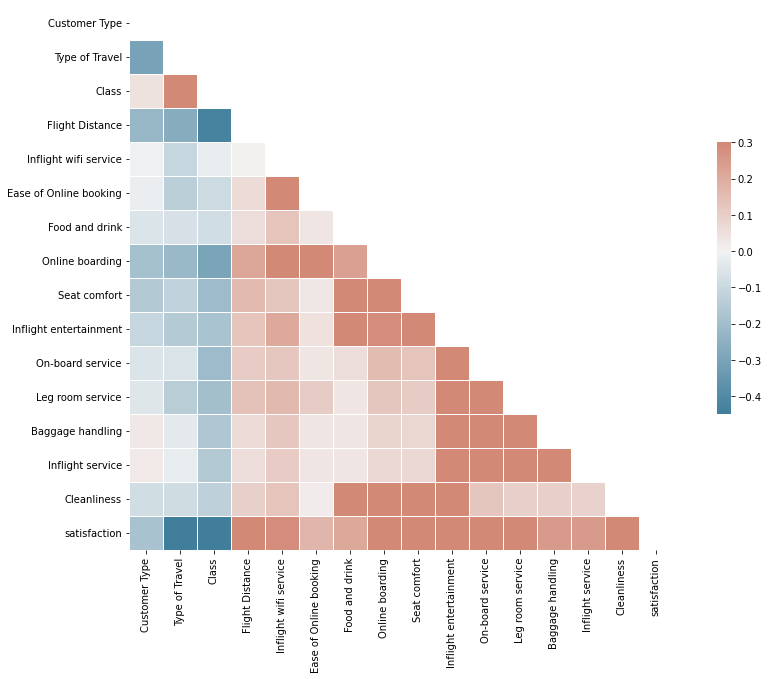

In [29]:
# Compute the correlation matrix
corr = selected_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
gp_df = selected_df.groupby(by = ['satisfaction', 'Class'])[selected_df.columns[0:7]].aggregate(['mean', 'median'])
gp_df

Customer Type        Type of Travel        Class         \
                            mean median           mean median  mean median   
satisfaction Class                                                           
0            0          0.293295    0.0       0.124182    0.0   0.0    0.0   
             1          0.246362    0.0       0.625543    1.0   1.0    1.0   
             2          0.118670    0.0       0.579915    1.0   2.0    2.0   
1            0          0.084901    0.0       0.007271    0.0   0.0    0.0   
             1          0.179784    0.0       0.307375    0.0   1.0    1.0   
             2          0.031602    0.0       0.169264    0.0   2.0    2.0   

                   Flight Distance         Inflight wifi service         \
                              mean  median                  mean median   
satisfaction Class                                                        
0            0         1422.436748  1054.0              2.401742    2.0   
             1          756.401419   611.0              2.397670    2.0   
             2          764.497171   598.5              2.395050    2.0   
1            0         1787.720906  1735.0              2.940163    3.0   
             1          687.885159   554.0              3.870116    4.0   
             2          691.194372   542.5              3.860173    4.0   

                   Ease of Online booking        Food and drink         
                                     mean median           mean median  
satisfaction Class                                                      
0            0                   2.769535    3.0       2.893136    3.0  
             1                   2.458774    2.0       2.992185    3.0  
             2                   2.566054    3.0       2.908911    3.0  
1            0                   2.979535    3.0       3.521905    4.0  
             1                   3.226564    4.0       3.494588    4.0  
             2                   2.958874    3.0       3.727706    4.0

In [43]:
gp_df = selected_df.groupby(by = ['satisfaction', 'Class'])[selected_df.columns[7:14]].aggregate(['mean', 'median'])
gp_df

Online boarding        Seat comfort         \
                              mean median         mean median   
satisfaction Class                                              
0            0            2.780517    3.0     3.001267    3.0   
             1            2.614868    3.0     3.060659    3.0   
             2            2.626591    3.0     2.990523    3.0   
1            0            4.131940    4.0     4.099141    4.0   
             1            3.678958    4.0     3.494496    4.0   
             2            3.680952    4.0     3.714286    4.0   

                   Inflight entertainment        On-board service         \
                                     mean median             mean median   
satisfaction Class                                                         
0            0                   2.694298    3.0         2.899366    3.0   
             1                   2.975537    3.0         3.073748    3.0   
             2                   2.866195    3.0         2.979774    3.0   
1            0                   4.055075    4.0         4.027085    4.0   
             1                   3.619978    4.0         3.321225    4.0   
             2                   3.898701    4.0         3.203030    3.0   

                   Leg room service        Baggage handling         \
                               mean median             mean median   
satisfaction Class                                                   
0            0             2.857761    3.0         3.201742    3.0   
             1             3.041978    3.0         3.444626    4.0   
             2             3.002263    3.0         3.370863    4.0   
1            0             3.993031    4.0         4.127340    4.0   
             1             3.265181    3.0         3.474684    4.0   
             2             3.222944    3.0         3.293506    4.0   

                   Inflight service         
                               mean median  
satisfaction Class                          
0            0             3.202693    3.0  
             1             3.462459    4.0  
             2             3.404385    4.0  
1            0             4.129036    4.0  
             1             3.487433    4.0  
             2             3.314719    4.0

### Observation:
------

In almost all cases, mean and medians of corresponding marks are lower in case of Negative prediction.

In [58]:
gp_df = selected_df.groupby(by = ['satisfaction', 'Type of Travel'])[selected_df.columns[0:7]].aggregate(['mean', 'median'])
gp_df

Customer Type        Type of Travel         \
                                     mean median           mean median   
satisfaction Type of Travel                                              
0            0                   0.479537    0.0            0.0    0.0   
             1                   0.004696    0.0            1.0    1.0   
1            0                   0.108376    0.0            0.0    0.0   
             1                   0.007398    0.0            1.0    1.0   

                                Class        Flight Distance          \
                                 mean median            mean  median   
satisfaction Type of Travel                                            
0            0               0.634298    1.0     1063.206241   733.0   
             1               1.048573    1.0      791.056937   628.0   
1            0               0.218151    0.0     1586.194284  1440.0   
             1               1.019236    1.0      800.720838   631.0   

                            Inflight wifi service         \
                                             mean median   
satisfaction Type of Travel                                
0            0                           2.400800    2.0   
             1                           2.396060    2.0   
1            0                           3.123183    3.0   
             1                           3.608138    4.0   

                            Ease of Online booking        Food and drink  \
                                              mean median           mean   
satisfaction Type of Travel                                                
0            0                            2.724502    3.0       2.857055   
             1                            2.368439    2.0       3.063523   
1            0                            2.994943    3.0       3.557416   
             1                            3.433539    4.0       3.108508   

                                    
                            median  
satisfaction Type of Travel         
0            0                 3.0  
             1                 3.0  
1            0                 4.0  
             1                 3.0

In [59]:
gp_df = selected_df.groupby(by = ['satisfaction', 'Type of Travel'])[selected_df.columns[7:14]].aggregate(['mean', 'median'])
gp_df

Online boarding        Seat comfort         \
                                       mean median         mean median   
satisfaction Type of Travel                                              
0            0                     2.599334    3.0     2.893657    3.0   
             1                     2.720427    3.0     3.188429    3.0   
1            0                     4.065240    4.0     4.025073    4.0   
             1                     3.515906    4.0     3.207891    3.0   

                            Inflight entertainment        On-board service  \
                                              mean median             mean   
satisfaction Type of Travel                                                  
0            0                            2.734223    3.0         2.778264   
             1                            3.055742    3.0         3.269264   
1            0                            4.036585    4.0         3.902772   
             1                            3.034279    3.0         3.260419   

                                   Leg room service        Baggage handling  \
                            median             mean median             mean   
satisfaction Type of Travel                                                   
0            0                 3.0         2.927547    3.0         3.182233   
             1                 3.0         3.055631    3.0         3.573818   
1            0                 4.0         3.863696    4.0         3.997146   
             1                 3.0         3.262639    4.0         3.573859   

                                   Inflight service         
                            median             mean median  
satisfaction Type of Travel                                 
0            0                 3.0         3.186315    3.0  
             1                 4.0         3.600078    4.0  
1            0                 4.0         3.999253    4.0  
             1                 4.0         3.611097    4.0